## 1. pandas
- pannel data의 약자
- 1. 다양한 파일 형식 지원 가능 → csv, excel, SQL, JSON 등등
- 2. 데이터 정재와 조작 특화된 라이브러리
- 3. DataFrame과 Series는 기본적으로 np.array(ndarray) 구조
    - numpy 라이브러리 호환 잘됨    

### 1.1 pandas에서 제공하는 데이터 구조
- Series : 1차원 배열 형태의 데이터 구조
    - index + value
- DataFrame : 2차원 배열 형태의 데이터 구조
    - Series들의 모음
    - column(열) + row(행) 구조
    - 서로 다른 자료형을 저장하여 활용할 수 있다

- 우리 궁극적인 목적은 "데이터 분석"이다!!

In [472]:
import numpy as np
import pandas as pd

### 1 Series 다루기

### 1.1 Series 생성

In [473]:
# Series 생성
pop = pd.Series([9668465,3391946,2942828,1450062])
print(pop, end='\n\n')

# index 명 지어주기
# pd.Series([시퀀스 자료구조, index=['인덱스명1','인덱스명2'...]])
pop = pd.Series([9668465,3391946,2942828,1450062],
                index=['서울','부산','인천','광주'])
print(pop)

0    9668465
1    3391946
2    2942828
3    1450062
dtype: int64

서울    9668465
부산    3391946
인천    2942828
광주    1450062
dtype: int64


In [474]:
# index 명을 부여해도 index 값이 사라지지는 않는다
pop[0] == pop['서울']

True

In [475]:
# Series 값 확인
print(pop.values, end='\n\n')
print(pop.array)

[9668465 3391946 2942828 1450062]

<PandasArray>
[9668465, 3391946, 2942828, 1450062]
Length: 4, dtype: int64


In [476]:
# Series index 확인
pop.index

Index(['서울', '부산', '인천', '광주'], dtype='object')

In [477]:
# Series 데이터 타입 확인
print(pop.dtype) # 요소들의 타입 확인
print(type(pop)) # Series 타입 확인

int64
<class 'pandas.core.series.Series'>


In [478]:
# Series에 이름 지정
# Series에 큰 타이틀 이름 지정

pop.name = '인구'

#Series에 index 이름 지정
pop.index.name = '지역'

In [479]:
pop

지역
서울    9668465
부산    3391946
인천    2942828
광주    1450062
Name: 인구, dtype: int64

### 1.2 Series 인덱싱, 슬라이싱
- 인덱싱 : 1개의 요소를 가리키는 것
= 슬라이싱 : 여러개의 요소를 잘라내는 것

In [480]:
print(pop[1]) # 정수 인덱싱
print(pop['부산']) # index 병멸 인데싱
print(pop[[0,3,1]]) # 다중 인덱싱(정수)
print(pop[['서울','광주','부산']]) #다중 인덱싱(정수)

3391946
3391946
지역
서울    9668465
광주    1450062
부산    3391946
Name: 인구, dtype: int64
지역
서울    9668465
광주    1450062
부산    3391946
Name: 인구, dtype: int64


### 1.3 "iloc"와 "loc"속성
    - iloc : integer location(정수 위치) → "행번호"를 가지고 값을 인덱싱 하는 방법
    - loc : location(위치) →"index 별명"을 가지고 값을 인덱싱, 슬라이싱 하는 방법

In [481]:
print(pop.iloc[0])
print(pop.iloc[0:2])

9668465
지역
서울    9668465
부산    3391946
Name: 인구, dtype: int64


### 1.4 Series Boolean 인덱싱
- 특정 조건을 만족하는 값들의 인덱싱
- Series[Boolean mask]

In [484]:
pop[pop >= 3000000]

지역
서울    9668465
부산    3391946
Name: 인구, dtype: int64

In [500]:
# 추가
pop['대구'] = 2465000

# 수정
pop['광주'] = 1501000

# 삭제
del pop['인천']

In [501]:
print(pop)

지역
서울    9668465
부산    3391946
광주    1501000
대구    2465000
Name: 인구, dtype: int64


## Series Boolean 인덱싱, 연산 실습!
- average monthly wage : 월 평균임금
- average daily wage : 일 평균임금

In [489]:
data = {'IT기획자':8644000, '데이터분석가':7158000,
       '응용SW개발자':6426000, 'IT품질관리자':8294000}

# 딕셔너리 자료형을 Series로 변환
sw_M_wage = pd.Series(data)
sw_M_wage

IT기획자      8644000
데이터분석가     7158000
응용SW개발자    6426000
IT품질관리자    8294000
dtype: int64

In [490]:
data2 = {'IT기획자':9543000, '데이터분석가':11226000,
       '시스템SW개발자':5100000, 'IT마케터':7801000}

sw_M_wage2 = pd.Series(data2)
sw_M_wage2

IT기획자        9543000
데이터분석가      11226000
시스템SW개발자     5100000
IT마케터        7801000
dtype: int64

In [491]:
# 일 평균임금 계산
# 실제로는 3개월 간의 총 임금을 그 기간의 총 일수로 나눠서 산정
# 대충 일한 일 수로만 계산해보자(23일)

sw_D_wage = (sw_M_wage/23).astype(int)
sw_D_wage

IT기획자      375826
데이터분석가     311217
응용SW개발자    279391
IT품질관리자    360608
dtype: int32

In [492]:
# 두 회사의 차이를 비교하기 위해 연산 실행
# Series끼리의 연산(가능하나 inner join으로만 나오게 된다)
# NaN : 결측치(비어있는 값)

wage_minus = sw_M_wage2 - sw_M_wage
wage_minus

IT기획자        899000.0
IT마케터             NaN
IT품질관리자           NaN
데이터분석가      4068000.0
시스템SW개발자          NaN
응용SW개발자           NaN
dtype: float64

In [493]:
# 비어있지 않는 데이터만 보는 경우
# notnull()
wage_minus[wage_minus.notnull()].astype(int)

IT기획자      899000
데이터분석가    4068000
dtype: int32

In [494]:
# 비어있는 데이터만 보는 경우
# isnull()
wage_minus[wage_minus.isnull()]

IT마케터      NaN
IT품질관리자    NaN
시스템SW개발자   NaN
응용SW개발자    NaN
dtype: float64

### 1.5 Series 데이터 추가, 수정, 삭제

In [495]:
# 수정
sw_M_wage2

IT기획자        9543000
데이터분석가      11226000
시스템SW개발자     5100000
IT마케터        7801000
dtype: int64

In [496]:
sw_M_wage2['IT기획자'] = 9742000
sw_M_wage2

IT기획자        9742000
데이터분석가      11226000
시스템SW개발자     5100000
IT마케터        7801000
dtype: int64

In [497]:
# 추가
sw_M_wage2['IT컨설턴트'] = 9805000
sw_M_wage2

IT기획자        9742000
데이터분석가      11226000
시스템SW개발자     5100000
IT마케터        7801000
IT컨설턴트       9805000
dtype: int64

In [498]:
# 삭제
del sw_M_wage2['시스템SW개발자']

In [499]:
sw_M_wage2

IT기획자      9742000
데이터분석가    11226000
IT마케터      7801000
IT컨설턴트     9805000
dtype: int64

## 2. DataFrame
- 2차원 데이터에서 사용되는 자료구조
- 엑셀, Csv, DB, API 등등 불러오되, 다시 재구성해야 함

In [538]:
# 첫번째 방법 : 딕셔너리를 통한 컬럼 단위로 생성

data = {'ITPM':[463,9543,57],
        '업무분석가':[544,11226,68],
       'IT아키텍트':[518,10672,64],
       'UIUX개발자':[291,6003,36]}
data

{'ITPM': [463, 9543, 57],
 '업무분석가': [544, 11226, 68],
 'IT아키텍트': [518, 10672, 64],
 'UIUX개발자': [291, 6003, 36]}

In [539]:
# DataFrame 화
df = pd.DataFrame(data)
df

,ITPM,업무분석가,IT아키텍트,UIUX개발자
0,463,544,518,291
1,9543,11226,10672,6003
2,57,68,64,36


In [540]:
# DataFrame index 별명 수정
df.index = ['일평균임금','월평균임금', '시간평균임금']
df

,ITPM,업무분석가,IT아키텍트,UIUX개발자
일평균임금,463,544,518,291
월평균임금,9543,11226,10672,6003
시간평균임금,57,68,64,36


In [541]:
# 두번쨰 방법 : row 단위로 list 활용
data2 = [[463,9543,57],
         [544,11226,68],
         [518,10672,64],
         [291,6003,36]]

columns = ['일평균임금','월평균임금','시간평균임금']
row = ['ITPM','업무분석가','IT아키텍트','UIUX개발자']
df = pd.DataFrame(data2, index=row, columns=columns)
df

,일평균임금,월평균임금,시간평균임금
ITPM,463,9543,57
업무분석가,544,11226,68
IT아키텍트,518,10672,64
UIUX개발자,291,6003,36


In [547]:
# index와 columns의 전치(위치를 뒤바꿈)
# Transpose의 약자 → T
df = df.T

In [548]:
df.values

array([[  463,   544,   518,   291],
       [ 9543, 11226, 10672,  6003],
       [   57,    68,    64,    36]], dtype=int64)

In [549]:
df.index

Index(['일평균임금', '월평균임금', '시간평균임금'], dtype='object')

In [550]:
df.columns

Index(['ITPM', '업무분석가', 'IT아키텍트', 'UIUX개발자'], dtype='object')

In [551]:
df

,ITPM,업무분석가,IT아키텍트,UIUX개발자
일평균임금,463,544,518,291
월평균임금,9543,11226,10672,6003
시간평균임금,57,68,64,36


## 2.1 DataFrame 인덱싱, 슬라이싱
- DataFrame은 "Series의 모임"이라고 생각하면 편함
- DataFrame 인덱싱 : 하나의 시리즈를 가져옴
- DataFrame 슬라이싱 : 여러 개의 원하는 부분을 가져옴

#### 2.1.1 열접근(컬럼 선택)
- DataFrame명['컬럼명']

In [559]:
# Series → 1차원 → []
df['ITPM']

일평균임금      463
월평균임금     9543
시간평균임금      57
Name: ITPM, dtype: int64

In [564]:
# DataFrame → 2차원 → [[]]
df[['ITPM']]

,ITPM
일평균임금,463
월평균임금,9543
시간평균임금,57


In [565]:
# DataFrame 추가
df['정보보안전문가']=[362,7426,45]
df

,ITPM,업무분석가,IT아키텍트,UIUX개발자,정보보안전문가
일평균임금,463,544,518,291,362
월평균임금,9543,11226,10672,6003,7426
시간평균임금,57,68,64,36,45


In [574]:
# 행 슬라이싱
df[0:2]

,ITPM,업무분석가,IT아키텍트,UIUX개발자,정보보안전문가
일평균임금,463,544,518,291,362
월평균임금,9543,11226,10672,6003,7426


In [ ]:
# 매우 헷갈림...
# DataFrame은 컬럼은 인덱싱으로 접근하고,
# row는 슬라이싱으로만 접근이 가능하냐...?
# 이건 아니다!

## 2.2 DataFrame 슬라이싱 → 인덱서(indexer) 활용
- 인덱서란?
    - DataFrame 객체에 대해서 "함수"가 아닌 "속성"으로써 행과 열을 한번에 인덱싱/슬라이싱 할 수 있는 기능
    - "속성"이라서 [] 대괄호 사용
<br><br>
- loc[] 인덱서
    - "인덱스 명"과 "컬럼 명"을 가지고 값을 인덱싱/슬라이싱하는 방법
<br><br>

- iloc[] 인덱서
    - "행 번호"와 "열 번호"를 가지고 값을 인덱싱/슬라이싱하는 방법 
    

In [78]:
df

,ITPM,업무분석가,IT아키텍트,UIUX개발자,정보보안전문가
일평균임금,463,544,518,291,362
월평균임금,9543,11226,10672,6003,7426
시간평균임금,57,68,64,36,45


In [577]:
df.loc[['시간평균임금']]

,ITPM,업무분석가,IT아키텍트,UIUX개발자,정보보안전문가
시간평균임금,57,68,64,36,45


In [95]:
display(df.loc['시간평균임금'])
display(df.iloc[2])

ITPM       57
업무분석가      68
IT아키텍트     64
UIUX개발자    36
정보보안전문가    45
Name: 시간평균임금, dtype: int64

ITPM       57
업무분석가      68
IT아키텍트     64
UIUX개발자    36
정보보안전문가    45
Name: 시간평균임금, dtype: int64

- loc 인덱서
    - DataFrame명.loc['인덱스 명'{,'컬럼 명'}] {생략가능}
    - 컬럼 명 생략시 전체 해당 행의 모든 열을 출력
- iloc 인덱서
    - DataFrame명.iloc['행 번호'{,'열 번호'}]
    - 열 번호 생략시 전체 해당 행의 모든 열을 출력

In [84]:
df

,ITPM,업무분석가,IT아키텍트,UIUX개발자,정보보안전문가
일평균임금,463,544,518,291,362
월평균임금,9543,11226,10672,6003,7426
시간평균임금,57,68,64,36,45


In [87]:
display(df.loc['시간평균임금','ITPM'])
display(df.iloc[2,0])

57

57

In [90]:
# 권장하지 않음. 컬럼명이 숫자로 시작하면 정수로 인식함
df.ITPM

일평균임금      463
월평균임금     9543
시간평균임금      57
Name: ITPM, dtype: int64

In [101]:
# 인덱서를 활용하여 슬라이싱
# DF.인덱서[행의 시작값:행의 끝값{,열의 시작값:열의 끝값}]
# 인덱서 활용하기 어렵다 → [:{,:}]

# loc → 끝값 포함
display(df.loc['월평균임금':'시간평균임금','업무분석가':'UIUX개발자'])\
# iloc → 끝값 미포함
display(df.iloc[1:3,1:4])

,업무분석가,IT아키텍트,UIUX개발자
월평균임금,11226,10672,6003
시간평균임금,68,64,36


,업무분석가,IT아키텍트,UIUX개발자
월평균임금,11226,10672,6003
시간평균임금,68,64,36


In [102]:
df

,ITPM,업무분석가,IT아키텍트,UIUX개발자,정보보안전문가
일평균임금,463,544,518,291,362
월평균임금,9543,11226,10672,6003,7426
시간평균임금,57,68,64,36,45


In [581]:
# 멀티 row, 멀티 column 접근
# 인덱싱값을 list로 보내준다! → list[]를 한번 더 써야함

display(df.loc[['일평균임금','시간평균임금']])
display(df.loc[['일평균임금','시간평균임금'],['ITPM','정보보안전문가']])
display(df.iloc[[0,2],[0,4]])

,ITPM,업무분석가,IT아키텍트,UIUX개발자,정보보안전문가
일평균임금,463,544,518,291,362
시간평균임금,57,68,64,36,45


,ITPM,정보보안전문가
일평균임금,463,362
시간평균임금,57,45


,ITPM,정보보안전문가
일평균임금,463,362
시간평균임금,57,45


## 2.3 DataFrame Boolean 인덱싱
- mask mask 활용 → "필터"

In [629]:
# 일평균임금이 400이상인 전체 데이터 추출
df = df.T
df

,일평균임금,월평균임금,시간평균임금
ITPM,463,9543,57
업무분석가,544,11226,68
IT아키텍트,518,10672,64
UIUX개발자,291,6003,36
정보보안전문가,362,7426,45


In [633]:
df.loc[:,'일평균임금'] >= 400

ITPM        True
업무분석가       True
IT아키텍트      True
UIUX개발자    False
정보보안전문가    False
Name: 일평균임금, dtype: bool

In [639]:
display(df[maks])

NameError: name 'maks' is not defined

In [634]:
df[df.loc[:,'일평균임금'] >= 400]

,일평균임금,월평균임금,시간평균임금
ITPM,463,9543,57
업무분석가,544,11226,68
IT아키텍트,518,10672,64


In [635]:
# 직업이 업무분석가와 정보보안전문가만 슬라이싱 한 이후,
# 시간평균임금이 50이상인 직업을 불리안 인덱싱
df

,일평균임금,월평균임금,시간평균임금
ITPM,463,9543,57
업무분석가,544,11226,68
IT아키텍트,518,10672,64
UIUX개발자,291,6003,36
정보보안전문가,362,7426,45


In [636]:
df1 = df.loc[['업무분석가','정보보안전문가']]

In [637]:
df1[df1.loc[:,'시간평균임금'] >= 50]

,일평균임금,월평균임금,시간평균임금
업무분석가,544,11226,68


### population 실습 - 값의 카운팅, 정렬
- pandas.read_csv('경로&파일명.확장자'{,encoding='방식', index_col='컬럼명'})
<br><br>
- encoding 방식(한글로 불러오는 방법 3가지, 웬만하면 이 3가지로 다 불러올 수 있다.)
    - euc-kr, utf-8, cp949
- index_col : 해당 컬럼을 index로 사용하는 속성

In [151]:
pd.read_csv('./data/population.csv')

,도시,지역,2020,2015,2010,2005
0,서울,수도권,9668465,10022181.0,10312545.0,10167344
1,부산,경상권,3391946,NaN,NaN,3628293
2,인천,수도권,2942828,2925815.0,NaN,2600495
3,광주,전라권,1450062,1474636.0,1454636.0,1401745
4,대구,경상권,2418436,2466052.0,2431774.0,2456016


In [154]:
pop=pd.read_csv('./data/population.csv', index_col='도시')
pop

,지역,2020,2015,2010,2005
도시,,,,,
서울,수도권,9668465,10022181.0,10312545.0,10167344
부산,경상권,3391946,NaN,NaN,3628293
인천,수도권,2942828,2925815.0,NaN,2600495
광주,전라권,1450062,1474636.0,1454636.0,1401745
대구,경상권,2418436,2466052.0,2431774.0,2456016


In [159]:
# value_counts() : 각각의 값이 나온 횟수를 세어주는 기능
pop['지역'].value_counts()

수도권    2
경상권    2
전라권    1
Name: 지역, dtype: int64

In [158]:
# 결측치(NaN)은 count 되지 않는다!
pop['2010'].value_counts()

10312545.0    1
1454636.0     1
2431774.0     1
Name: 2010, dtype: int64

In [167]:
# sort_index : 인덱스를 기준으로 정렬
pop.sort_index(ascending=True)

,지역,2020,2015,2010,2005
도시,,,,,
광주,전라권,1450062,1474636.0,1454636.0,1401745
대구,경상권,2418436,2466052.0,2431774.0,2456016
부산,경상권,3391946,NaN,NaN,3628293
서울,수도권,9668465,10022181.0,10312545.0,10167344
인천,수도권,2942828,2925815.0,NaN,2600495


In [175]:
# 1. 열접근을 통해서 정렬하는 방법
# sort_values() : 데이터값을 기준으로 정렬
# NaN은 항상 ascending에 상관없이 마지막에 위치
pop['2015'].sort_values()

도시
광주     1474636.0
대구     2466052.0
인천     2925815.0
서울    10022181.0
부산           NaN
Name: 2015, dtype: float64

In [180]:
# 2. DataFrame에서 기준을 정해서 정렬하는 방법
pop.sort_values('2015')

,지역,2020,2015,2010,2005
도시,,,,,
광주,전라권,1450062,1474636.0,1454636.0,1401745
대구,경상권,2418436,2466052.0,2431774.0,2456016
인천,수도권,2942828,2925815.0,NaN,2600495
서울,수도권,9668465,10022181.0,10312545.0,10167344
부산,경상권,3391946,NaN,NaN,3628293


In [181]:
# 이중 정렬!
# by = ['컬럼명1','컬럼명2',...] → 컬럼명 1 정렬 이후 컬럼명 2정렬
pop.sort_values(['지역','2010'])

,지역,2020,2015,2010,2005
도시,,,,,
대구,경상권,2418436,2466052.0,2431774.0,2456016
부산,경상권,3391946,NaN,NaN,3628293
서울,수도권,9668465,10022181.0,10312545.0,10167344
인천,수도권,2942828,2925815.0,NaN,2600495
광주,전라권,1450062,1474636.0,1454636.0,1401745


## 3. score 실습 - DataFrame 정렬 복습 및 연산 실습

In [185]:
score=pd.read_csv('./data/score.csv',encoding='euc-kr', index_col='과목')
score

,1반,2반,3반,4반
과목,,,,
파이썬,45,44,73,39
DB,76,92,45,69
자바,47,92,45,69
크롤링,92,81,85,40
Web,11,79,47,26


### axis=0, axis=1
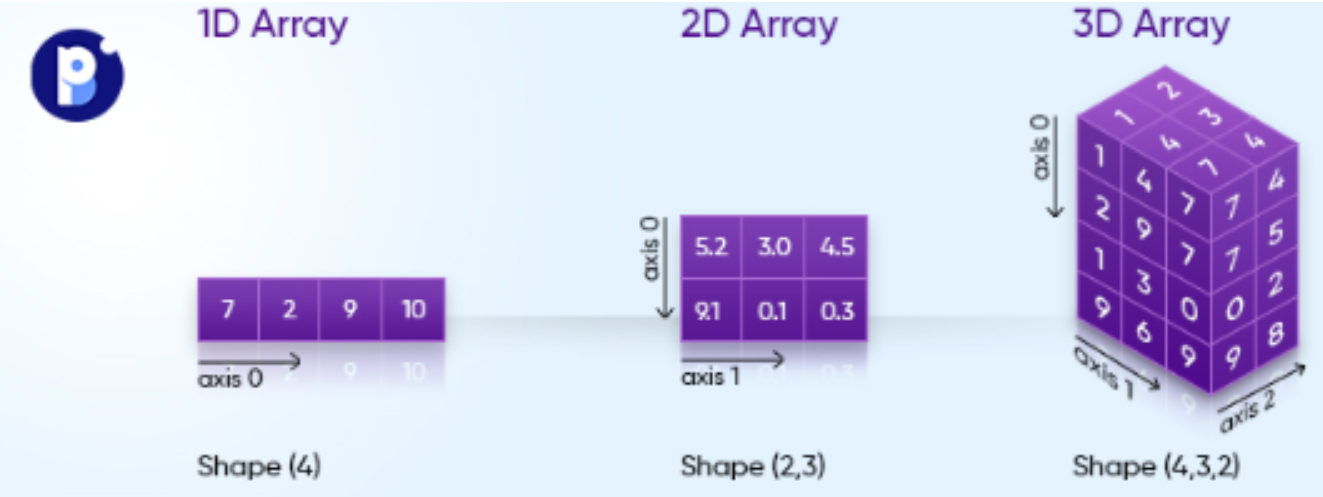
- axis : 축의 방향을 뜻함('axis=0 == 행방향'과 'axis=1 == 열방향')
- axis=0 → 위아래로!, axis=1 → 양옆으로!
- axis=0 → 기본값

In [186]:
# sum() : 합계
# axis : 축의 방향을 설정하는 속성

# axis = 0 : 기본값, 위아래 연산(행방향)
score

,1반,2반,3반,4반
과목,,,,
파이썬,45,44,73,39
DB,76,92,45,69
자바,47,92,45,69
크롤링,92,81,85,40
Web,11,79,47,26


In [188]:
score.sum(axis=0)

1반    271
2반    388
3반    295
4반    243
dtype: int64

In [189]:
score.sum(axis=1)

과목
파이썬    201
DB     282
자바     253
크롤링    298
Web    163
dtype: int64

In [191]:
# 새로운 컬럼 추가
score['5반']=[90,85,88,93,99]
score

,1반,2반,3반,4반,5반
과목,,,,,
파이썬,45,44,73,39,90
DB,76,92,45,69,85
자바,47,92,45,69,88
크롤링,92,81,85,40,93
Web,11,79,47,26,99


In [196]:
# 2반을 기준으로 내림차순
score.sort_values('2반',ascending=False)

,1반,2반,3반,4반,5반
과목,,,,,
DB,76,92,45,69,85
자바,47,92,45,69,88
크롤링,92,81,85,40,93
Web,11,79,47,26,99
파이썬,45,44,73,39,90


In [201]:
# drop() → '행'을 삭제하는 기능
# inplace = false → 기본값, True일 경우 즉시 적용

score.drop('DB', inplace=True)

In [203]:
score

,1반,2반,3반,4반,5반
과목,,,,,
파이썬,45,44,73,39,90
자바,47,92,45,69,88
크롤링,92,81,85,40,93
Web,11,79,47,26,99


In [204]:
# del 객체 → "열"을 삭제
# inplace 없이 바로 반영!
del score['5반']

In [205]:
score

,1반,2반,3반,4반
과목,,,,
파이썬,45,44,73,39
자바,47,92,45,69
크롤링,92,81,85,40
Web,11,79,47,26


In [411]:
# 다시 불러오기
score = pd.read_csv('./data/score.csv', encoding='cp949', index_col='과목')
score

,1반,2반,3반,4반
과목,,,,
파이썬,45,44,73,39
DB,76,92,45,69
자바,47,92,45,69
크롤링,92,81,85,40
Web,11,79,47,26


In [ ]:
#과목별 합계를 구하여 '합계' 컬럼을 생성

In [215]:
score['합계']=score.sum(axis=1)
score

,1반,2반,3반,4반,합계
과목,,,,,
파이썬,45,44,73,39,201
DB,76,92,45,69,282
자바,47,92,45,69,253
크롤링,92,81,85,40,298
Web,11,79,47,26,163


In [412]:
# 누적을 피하기 위해서는 슬라이싱을 해줘야 한다...!!
# 정확한 슬라이싱 범위를 지정해서 누적을 피할 수 있음...!!

score['합계']=score.loc[:,:'4반'].sum(axis=1)
score

,1반,2반,3반,4반,합계
과목,,,,,
파이썬,45,44,73,39,201
DB,76,92,45,69,282
자바,47,92,45,69,253
크롤링,92,81,85,40,298
Web,11,79,47,26,163


In [424]:
# 반 평균을 구해보기
score.loc['반평균']=score.loc[:'Web'].mean(axis=0)

In [426]:
score=score.astype(int)
score

,1반,2반,3반,4반,합계
과목,,,,,
파이썬,45,44,73,39,201
DB,76,92,45,69,282
자바,47,92,45,69,253
크롤링,92,81,85,40,298
Web,11,79,47,26,163
반평균,54,77,59,48,239


### .apply() 함수
- pandas 객체(Series, DataFrame)에 "열" 혹은 "행"에 대해 함수를 적용하게 해주는 메소드
- pandas 라이브러리에 다른 라이브러리의 함수를 적용하는 방법
    - numpy의 라이브러리 엮을 때 사용

In [428]:
data = {
    'Name': ['John', 'Anna', 'Peter', 'Linda'],
    'Email': ['john@gmail.com', 'anna@yahoo.com', 'peter@gmail.com', 'linda@outlook.com']
}
df = pd.DataFrame(data)
df

,Name,Email
0,John,john@gmail.com
1,Anna,anna@yahoo.com
2,Peter,peter@gmail.com
3,Linda,linda@outlook.com


In [429]:
# 각 Email부분에서 도메인을 추출
# '@'기호 기준ㄴ으로 도메인 주소를 분할

def extract_domain(email) :
    return email.split('@')[1]

In [450]:
df['Domain']= df['Email'].apply(extract_domain)
df

,Name,Email,Domain
0,John,john@gmail.com,gmail.com
1,Anna,anna@yahoo.com,yahoo.com
2,Peter,peter@gmail.com,gmail.com
3,Linda,linda@outlook.com,outlook.com


In [454]:
def plus(num):
    return num+10

In [470]:
# applymap() → "요소"전체에 접근해서 함수를 적용시키는 메소드
score.applymap(plus)

,1반,2반,3반,4반,합계
과목,,,,,
파이썬,55,54,83,49,211
DB,86,102,55,79,292
자바,57,102,55,79,263
크롤링,102,91,95,50,308
Web,21,89,57,36,173
반평균,64,87,69,58,249
